In [146]:
import pandas as pd
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import numpy.linalg as la

In [27]:
df = pd.read_excel('C:/Users/Aleksandr/in_work.xlsx', index_col = 0)

In [28]:
df.tail()

,y,ds,f1,f2,integral
4255,179.416667,2019-11-12,0.259444,179.449281,194.610099
4256,179.563333,2019-11-13,0.073722,179.580451,194.704924
4257,179.610000,2019-11-14,0.031542,179.608913,194.747471
4258,179.642000,2019-11-15,0.058333,179.643897,194.777738
4259,179.667500,2019-11-16,0.026944,179.667500,0.000000


In [29]:
df.shape

(4260, 5)

In [30]:
seed = 42
l = SGDRegressor(random_state = seed)
scaler = StandardScaler()
tcv = TimeSeriesSplit(n_splits = 5)
params = {'loss': ['squared_loss', 'huber'], 
          'penalty' : ['l2'], 
          'max_iter' : np.arange(100, 1000, 100), 
          'alpha' : np.linspace(6e-07, 6e-04, num = 30)}

In [31]:
X = df[['f1', 'f2', 'integral']]
X_scaled = scaler.fit_transform(X)
y = df['y']

In [32]:
model = GridSearchCV(l, params, scoring = 'neg_mean_squared_error', cv = tcv)

In [33]:
model.fit(X_scaled, y)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=42, shuffl...
       4.13979310e-04, 4.34648276e-04, 4.55317241e-04, 4.75986207e-04,
       4.96655172e-04, 5.17324138e-04, 5.37993103e-04, 5.58662069e-04,
       5.79331034e-04, 6.00000000e-04]),
                         'loss': ['squared_loss', 'huber'],
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'penalty': ['l2']},
        

In [34]:
print(model.best_estimator_)
print(model.best_score_)
print(model.best_params_)

SGDRegressor(alpha=6e-07, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=900,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
-10.196723332997905
{'alpha': 6e-07, 'loss': 'squared_loss', 'max_iter': 900, 'penalty': 'l2'}


In [35]:
m1 = model.best_estimator_
score1 = cross_val_score(m1, X_scaled, y, scoring = 'neg_mean_squared_error', cv = tcv)
score1.mean()

-10.196723332997902

result regression

In [36]:
df1 = pd.read_excel('C:/Users/Aleksandr/forecast1_f1.xlsx', index_col = 0)
df2 = pd.read_excel('C:/Users/Aleksandr/forecast2_f2.xlsx', index_col = 0)
df_int = pd.read_excel('C:/Users/Aleksandr/forecast3_integral.xlsx', index_col = 0)

In [37]:
df1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4755,2021-03-26,0.132475,-0.367532,0.608439,0.131362,0.133487,0.011790,0.011790,0.011790,0.001001,0.001001,0.001001,0.010789,0.010789,0.010789,0,0,0,0.144265
4756,2021-03-27,0.132523,-0.340670,0.669232,0.131405,0.133539,0.016363,0.016363,0.016363,0.006558,0.006558,0.006558,0.009805,0.009805,0.009805,0,0,0,0.148886
4757,2021-03-28,0.132571,-0.348333,0.654601,0.131448,0.133592,0.007568,0.007568,0.007568,-0.000805,-0.000805,-0.000805,0.008373,0.008373,0.008373,0,0,0,0.140139
4758,2021-03-29,0.132619,-0.379650,0.653371,0.131490,0.133644,-0.011362,-0.011362,-0.011362,-0.017962,-0.017962,-0.017962,0.006600,0.006600,0.006600,0,0,0,0.121257
4759,2021-03-30,0.132667,-0.376453,0.659616,0.131533,0.133697,-0.002098,-0.002098,-0.002098,-0.006706,-0.006706,-0.006706,0.004608,0.004608,0.004608,0,0,0,0.130569


In [38]:
df1 = df1.drop(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper'], axis = 1)
df1 = df1.rename(columns = {'yhat': 'f1'})
df1.head()

,ds,f1
0,2008-03-19,0.016328
1,2008-03-20,0.012198
2,2008-03-21,0.010387
3,2008-03-22,0.017882
4,2008-03-23,0.011815


In [39]:
df2 = df2.drop(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper'], axis = 1)
df2 = df2.rename(columns = {'yhat': 'f2'})
df2.head()

,ds,f2
0,2008-03-19,18.613224
1,2008-03-20,18.590199
2,2008-03-21,18.557856
3,2008-03-22,18.526530
4,2008-03-23,18.517985


In [40]:
df_int = df_int.drop(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper'], axis = 1)
df_int = df_int.rename(columns = {'yhat': 'f_int'})
df_int.head()

,ds,f_int
0,2008-03-19,20.477305
1,2008-03-20,20.446953
2,2008-03-21,20.414823
3,2008-03-22,20.070819
4,2008-03-23,20.353479


In [41]:
df_int.tail()

,ds,f_int
4755,2021-03-26,244.001199
4756,2021-03-27,243.781335
4757,2021-03-28,244.186023
4758,2021-03-29,244.260651
4759,2021-03-30,244.347346


In [42]:
data = pd.concat([df1['f1'], df2['f2'], df_int['f_int']], axis = 1)
print(data.shape)
data.head()

(4760, 3)


,f1,f2,f_int
0,0.016328,18.613224,20.477305
1,0.012198,18.590199,20.446953
2,0.010387,18.557856,20.414823
3,0.017882,18.526530,20.070819
4,0.011815,18.517985,20.353479


In [43]:
train_data = data[:-500]
test_data = data[-500:]
train_data.shape, test_data.shape

((4260, 3), (500, 3))

In [44]:
train_data.tail()

,f1,f2,f_int
4255,0.078242,179.277996,192.964705
4256,0.091214,179.345575,192.997004
4257,0.078657,179.416337,193.037720
4258,0.069973,179.469023,193.079045
4259,0.072248,179.515292,192.812939


In [45]:
test_data.head()

,f1,f2,f_int
4260,0.062660,179.578331,193.179827
4261,0.044307,179.605252,193.226353
4262,0.055340,179.624203,193.295507
4263,0.075276,179.669690,193.378916
4264,0.069518,179.725375,193.477976


In [46]:
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [47]:
m1.fit(train_scaled, y)
preds = m1.predict(test_scaled)

In [48]:
preds

array([179.23103162, 179.28073531, 179.31326784, 179.35859424,
       179.43687385, 179.50949797, 179.433972  , 179.67210505,
       179.75475968, 179.82213658, 179.90289024, 180.01586012,
       180.1211483 , 180.075041  , 180.33823557, 180.4406247 ,
       180.52161156, 180.60925087, 180.72199998, 180.81980988,
       180.75905339, 181.00075185, 181.0753518 , 181.12302584,
       181.17279286, 181.2442421 , 181.2985922 , 181.19358277,
       181.39166134, 181.424718  , 181.43434321, 181.45090531,
       181.49523329, 181.52963723, 181.41276521, 181.60776037,
       181.64697157, 181.6721937 , 181.71373481, 181.79209604,
       181.86899678, 181.80224398, 182.05390883, 182.15506384,
       182.24605584, 182.35561083, 182.50255607, 182.64689042,
       182.6447006 , 182.95638546, 183.11143981, 183.248772  ,
       183.39585013, 183.57046078, 183.73181043, 183.73546634,
       184.04159807, 184.1797709 , 184.28926485, 184.39821409,
       184.52535087, 184.63108448, 184.57241247, 184.81

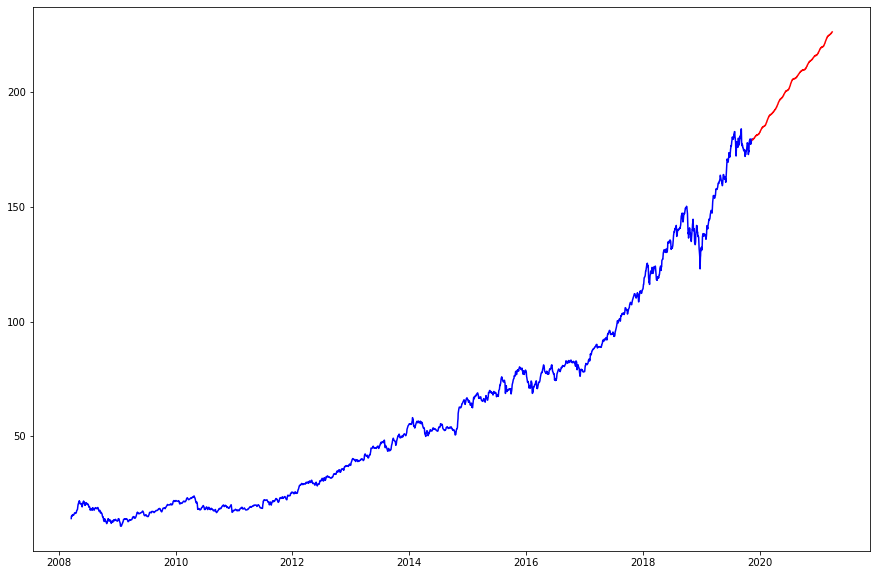

In [49]:
plt.figure(figsize = (15, 10))
plt.plot(df1.ds[:-500], y, c = 'blue')
plt.plot(df1.ds[-500:], preds, c = 'red')

In [50]:
train_data.tail
N=train_data['f1'].size
N
test_data.head()

,f1,f2,f_int
4260,0.062660,179.578331,193.179827
4261,0.044307,179.605252,193.226353
4262,0.055340,179.624203,193.295507
4263,0.075276,179.669690,193.378916
4264,0.069518,179.725375,193.477976


In [51]:
A = np.zeros((N,3))
A[:,0]=train_data['f1'].tolist()
A[:,1]=train_data['f2'].tolist()
A[:,2]=train_data['f_int'].tolist()
b=np.zeros(N)
b=y.tolist()
new_A=(A.T).dot(A)
new_b=(A.T).dot(b)
alpha = la.solve(new_A,new_b)
preds_2=test_data.dot(alpha)
preds_2.head()
b

[14.12,
 15.105,
 15.105,
 15.105,
 15.105,
 15.51,
 15.37,
 15.57666666666667,
 15.615,
 15.63,
 15.805,
 15.80333333333333,
 15.67,
 15.56,
 15.52333333333334,
 15.7375,
 15.814,
 15.87,
 16.02666666666667,
 16.25333333333333,
 16.46666666666667,
 16.57666666666667,
 16.565,
 16.558,
 16.6325,
 16.50333333333333,
 16.49333333333334,
 16.34666666666667,
 16.35,
 16.4525,
 16.612,
 16.66,
 16.85,
 17.25,
 17.52,
 17.61,
 17.725,
 17.934,
 17.9825,
 18.12,
 18.58333333333333,
 19.3,
 19.99666666666667,
 20.335,
 20.406,
 20.78,
 20.96666666666667,
 21.10333333333334,
 21.28,
 21.75666666666667,
 21.7725,
 21.56,
 21.6325,
 21.55000000000001,
 21.00333333333334,
 20.59333333333334,
 20.54333333333334,
 20.5475,
 20.556,
 20.575,
 20.57,
 20.66,
 20.7,
 20.57333333333333,
 20.2625,
 20.028,
 19.8275,
 19.54333333333334,
 19.21000000000001,
 19.38500000000001,
 20.08000000000001,
 20.49000000000001,
 20.765,
 20.765,
 21.12666666666667,
 21.47333333333334,
 21.66666666666667,
 21.593333333

In [96]:
check_data = y[-500:].tolist()
test_lasso = train_data[-500:]
lasso_data = data[:-1000]
check_data[1]

132.8324999999999

In [103]:
#find best alpha



A = np.zeros((N-500,3))
A[:,0]=lasso_data['f1'].tolist()
A[:,1]=lasso_data['f2'].tolist()
A[:,2]=lasso_data['f_int'].tolist()
b=np.zeros(N-500)
b=y[:-500].tolist()
S=0
main_theta=0.0001
theta=0.0001

# for i in range(N-500-1):
#     S=S+b[i]**2
    
# S=S**(0.5)
# for i in range(N-500-1):
#     b[i]=b[i]/S

E=np.eye(3)
delta=1000000
for i in range(1000):
    new_A=((A.T).dot(A)+theta*E)
    inverse_new_A = la.inv(new_A)
    new_A=inverse_new_A.dot(A.T)
    beta=new_A.dot(b)
    check=test_lasso.dot(beta).tolist()
    theta-=0.00001
    sum=0
    for j in range(500):
        sum+=(check_data[1]-check[1])**2
    if (sum)**0.5 < delta :
        main_theta=theta
        delta=(sum)**0.5
print(main_theta)
print(delta)
#     #for j in range(500):
        
# main_theta    
    

9e-05
12.926043238923976


In [108]:
# f1_2=(new_A[0][0])**(0.5)
# f2_2=(new_A[1][1])**(0.5)
# fint_2=(new_A[2][2])**(0.5)
# S=0
# for i in range(N-1):
#     S=S+b[i]**2
# S=S**(0.5)
# for i in range(N-1):
#     b[i]=b[i]/S
# #     A[i,0]=A[i,0]/f1_2     
# #     A[i,1]=A[i,1]/f2_2
# #      A[i,2]=A[i,2]/fint_2
E=np.eye(3)
b=np.zeros(N)
b=y.tolist()
A = np.zeros((N,3))
A[:,0]=train_data['f1'].tolist()
A[:,1]=train_data['f2'].tolist()
A[:,2]=train_data['f_int'].tolist()
theta=0.01


new_A=((A.T).dot(A)+theta*E)
inverse_new_A = la.inv(new_A)
new_A=inverse_new_A.dot(A.T)
beta=new_A.dot(b)
preds_3=test_data.dot(beta)
preds_3.head()

4260    180.605732
4261    180.598589
4262    180.590195
4263    180.629738
4264    180.647759
dtype: float64

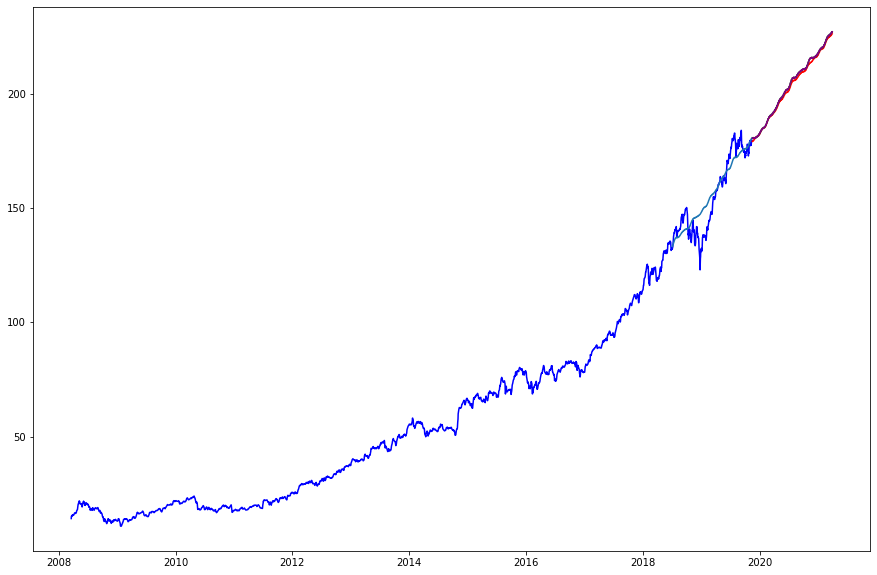

In [109]:
plt.figure(figsize = (15, 10))
plt.plot(df1.ds[:-500], y, c = 'blue')
plt.plot(df1.ds[-1000:-500],check)
plt.plot(df1.ds[-500:], preds, c = 'red')
plt.plot(df1.ds[-500:], preds_2, c = 'green')
plt.plot(df1.ds[-500:], preds_3, c = 'purple')

False True
False False
True False
True True
False False
True True
False True
False True
False False
True False
True True
False False
True True
False True
False True
False False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False False
True False
True False
True False
True False
True False
True True
False Fals

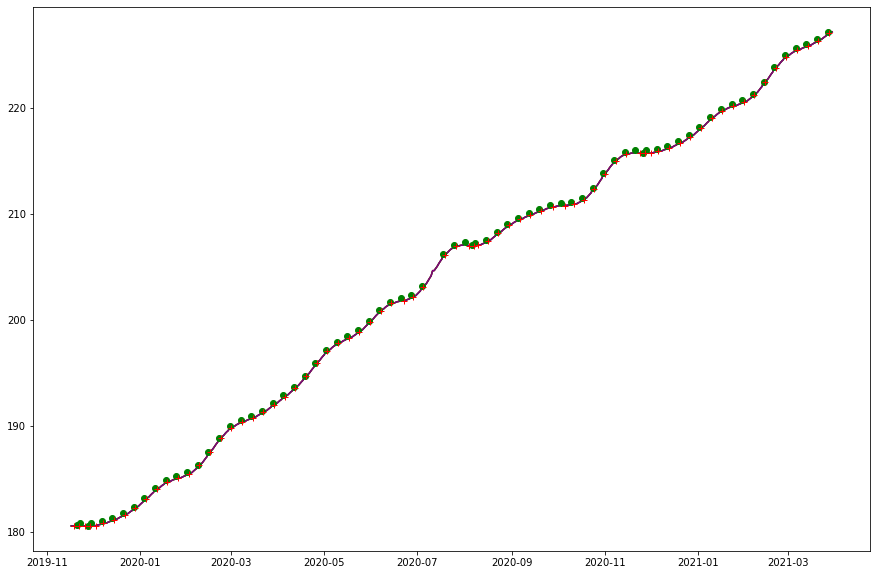

In [168]:

plt.figure(figsize = (15, 10))
plt.plot(df1.ds[-500:], preds, c = 'red')
plt.plot(df1.ds[-500:], preds_2, c = 'green')
plt.plot(df1.ds[-500:], preds_3, c = 'purple')
k=0
delta1=0.
delta2=0.
suggest=preds_2.tolist()
data=df1.ds[-500:].tolist()
data_sale=[]
data_purchase=[]
price_sale=[]
price_purchase=[]
#max_m=np.r_[True, suggest[1:] < suggest[:-1]] 
#min_m=np.r_[suggest[:-1] < suggest[1:], True]
#print(max_m)
for i in range(500-2):
    delta1=suggest[i]-suggest[i+1]
    delta2=suggest[i+1]-suggest[i+2]
    print(delta1<0 ,delta2>0)
    if (delta1<0)and(delta2>0):
        plt.plot( data[i+1], suggest[i+1], 'og')
#         data_sale.append(data[i+1])
#         price_sale.append(suggest[i+1])
    if (suggest[i] > suggest[i+1]) and (suggest[i+1]<suggest[i+2]) :
        data_purchase.append(data[i+1])
        price_purchase.append(suggest[i+1])
plt.plot( data_sale, price_sale, 'og')
plt.plot(data_purchase, price_purchase, '+r')


In [160]:
suggest= [1, 4, 5, 3, 6, 7]
for i in range(4):
    if ((suggest[i]-suggest[i+1]<0) and (suggest[i+1]-suggest[i+2]>0)):
        print(i+1)


2
